# Expression for simplified likelihood

In [ ]:
from math import *

In [ ]:
import matplotlib.pyplot as plt
from sympy import *


$$L_s(\mu,\theta)=\prod_{i=1}^{N}{\frac{(\mu\cdot s_i+b_i+\theta_i)^{n_i}e^{-(\mu\cdot s_i+b_i+\theta_i)}}{n_i!}}\cdot exp\; ( \;   -\frac{1}{2}\theta^TV^{-1}\theta) $$


# Log likelihood will be:

$$[\sum_{i=1}^{N}{n_i\ln(\mu\cdot s_i+b_i+\theta_i) -(\mu\cdot s_i+b_i+\theta_i) - \ln n_i!}]\; -\frac{1}{2} \theta^TV^{-1}\theta$$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import *
import math
from tqdm import tqdm

In [2]:
a,b,c,d,e,f,g,h=symbols('theta_1 theta_2 theta_3 theta_4 theta_5 theta_6 theta_7 theta_8')

In [3]:
theta=Matrix([a,b,c,d,e,f,g,h])

In [ ]:
theta

In [4]:
# initialisation of values
signal= np.loadtxt('toydata.dat', usecols=(2) )
events=np.loadtxt('toydata.dat', usecols=0)
bkg=np.loadtxt('toydata.dat', usecols=1)
event=np.loadtxt('toydata.dat', dtype=int, usecols=0)

In [5]:
covar=Matrix([[16787.2, -1691.3, -4520.3, -3599.9, -2286.4, -1316.5, -719.8, -381.1],
[-1691.3, 603.1, 754.6, 513.3, 294, 154.9, 78.1, 38.3],
[-4520.3, 754.6, 1454, 1110.9, 691.1, 392.3, 212.1, 111.2],
[-3599.9, 513.3, 1110.9, 871.2, 551.8, 318.1, 174.3, 92.5],
[-2286.4, 294, 691.1, 551.8, 353.9, 206.2, 114.1, 61],
[-1316.5, 154.9, 392.3, 318.1, 206.2, 121.3, 67.6, 36.4],
[-719.8, 78.1, 212.1, 174.3, 114.1, 67.6, 38, 20.6],
[-381.1, 38.3, 111.2, 92.5, 61, 36.4, 20.6, 11.2
]])


In [6]:
covar_inv=covar**(-1)

In [7]:
covar_inv

Matrix([
[ 0.0880281704331599, -0.60105205964865,  1.30430612315071, -0.844329867930896, -0.0258021672667146, -0.106942791126909, 0.191022978001308, -0.789189466131077],
[ -0.601052059648645,  4.18956006522348, -9.34932533976417,   6.48613702656857,    0.23289043016035,  0.178077299770122, -1.75561398800487,   5.86013666031353],
[   1.30430612315067, -9.34932533976399,  22.0606904822456,  -17.6206972967423,   0.277106812664878,   2.01916879350723,  6.27249527201773,  -16.7588142759955],
[  -0.84432986793081,    6.486137026568, -17.6206972967413,    19.650119814013,    -4.9913776069922,  -5.09130582297956, -10.9016181967469,   25.5324282724469],
[-0.0258021672667659, 0.232890430160741, 0.277106812663825,  -4.99137760699113,    9.11836829564807,  -3.10757278229965,  9.84167437761756,  -20.8667917214112],
[ -0.106942791126945, 0.178077299770364,  2.01916879350679,  -5.09130582297963,   -3.10757278229909,   13.6405033980106,  -3.6762644332697,  -2.89137286910775],
[  0.191022978001242, -1.

# MLE for $\mu$ :


$$\sum_{i=1}^N{\frac{n_i\cdot s_i}{\hat{\mu} \cdot s_i+b_i+\theta_i}} = \sum_{i=1}^N{s_i}$$

# MLE for $\theta_i$:

$$\frac{n_i}{\mu \cdot s_i+b_i+\hat{\theta_i}}=1+\sum_j{V^{-1}_{ij}\theta_j}$$

## we will use newtons iteration method to solve these 8 simul polynomial equations

## matrix form 

$$F(\theta)=diag(\mu\cdot s+b+\theta)([1]+[V^{-1}][\theta])-[n]$$

In [8]:
#generating F[\theta]
u=symbols('\mu')
k=Matrix(u*signal+bkg)+theta
k=diag(k[0],k[1],k[2],k[3],k[4],k[5],k[6],k[7])

In [9]:
# F[\theta]
F_theta=k*(covar_inv*theta+Matrix([1,1,1,1,1,1,1,1]))-Matrix(events)

In [10]:
#Jacobian for F[\theta]
JF_theta=F_theta.jacobian(theta)

In [11]:
# initial guess for solution
guess=Matrix([0,0,0,0,0,0,0,0])

In [12]:
# applying newtons iteration method to find root with an inital guess=guess[]
with open('thetas.dat','w') as wf:
    for j in tqdm(range(231)):
        l=j*0.01
    
        for i in range(10):
                n=(JF_theta.subs({u:-0.4+l,a:guess[0],b:guess[1],c:guess[2],d:guess[3],e:guess[4],f:guess[5],g:guess[6],h:guess[7]})**-1)*(F_theta.subs({u:-0.4+l,a:guess[0],b:guess[1],c:guess[2],d:guess[3],e:guess[4],f:guess[5],g:guess[6],h:guess[7]}))
                guess=guess-n
        wf.write('%2.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  \n'%(-0.4+l,guess[0],guess[1],guess[2],guess[3],guess[4],guess[5],guess[6],guess[7]))
        guess=Matrix([0,0,0,0,0,0,0,0])

100%|██████████| 231/231 [15:01<00:00,  3.90s/it]


In [13]:
#generating log likelihood for each \mu and \theta from the generated file 'thetas.dat'

theta1=np.loadtxt('thetas.dat', usecols=(1))
theta2=np.loadtxt('thetas.dat', usecols=(2))
theta3=np.loadtxt('thetas.dat', usecols=(3))
theta4=np.loadtxt('thetas.dat', usecols=(4))
theta5=np.loadtxt('thetas.dat', usecols=(5))
theta6=np.loadtxt('thetas.dat', usecols=(6))
theta7=np.loadtxt('thetas.dat', usecols=(7))
theta8=np.loadtxt('thetas.dat', usecols=(8))
thetass=[theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8]

In [14]:
#generating log likelihood file
with open('llh_full.dat','w') as wf:
    for i in range(231):
        m=i*0.01
        o=theta.subs({a:theta1[i],b:theta2[i],c:theta3[i],d:theta4[i],e:theta5[i],f:theta6[i],g:theta7[i],h:theta8[i]})
        p=(1/2)*o.T*covar_inv*o
        sum1=0
        
        for j in range (8):
            q=(-0.4+m)*signal[j]+bkg[j]+thetass[j][i]
            
            r=events[j]*math.log(q)-q-math.log(math.factorial(event[j]))
            
            sum1=sum1+r
        z=Matrix([sum1])-p
        wf.write('%1.2f  %8.4f  \n'%(-0.4+m,z[0]))
             
            
        

## now for different values of $\mu$ and with corresponding $[\hat{\theta}]$ we will plot log likelihood and will profile out the $\hat{\mu}$ for which log likelihood is maximum

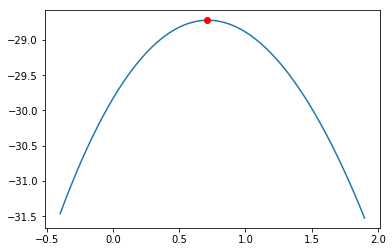

In [15]:
x=np.loadtxt('llh_full.dat', usecols=0)
y=np.loadtxt('llh_full.dat', usecols=1)
plt.plot(x,y)
plt.plot(.71,-28.7216, 'ro')
plt.show()

## from the file 'llh_full.dat' we see that maximum value of the likelihood occurs at $\mu=0.71$

# plotting $q(\mu) vs \mu$ for both full correlation and no correlation case

In [16]:
llh_full=-28.7216

In [17]:
# q(u):
llh1=np.loadtxt('llh_full.dat', usecols=1)
q_u=(llh1-llh_full)*(-2)

In [ ]:
# no correlation case data imported from 'simplified_no_cov' file
%store -r x1
%store -r q_u_noco

In [ ]:
cms_x_full=np.loadtxt('CMS.dat', skiprows=2,usecols=0)
cms_y_full=np.loadtxt('CMS.dat', skiprows=2,usecols=1)
cms_x_noco=np.loadtxt('CMS_noco.dat',skiprows=2,usecols=0)
cms_y_noco=np.loadtxt('CMS_noco.dat', skiprows=2,usecols=1)


In [ ]:
full_x=np.loadtxt('full-cms.dat',skiprows=1,usecols=0)
full_y=np.loadtxt('full-cms.dat',skiprows=1,usecols=1)


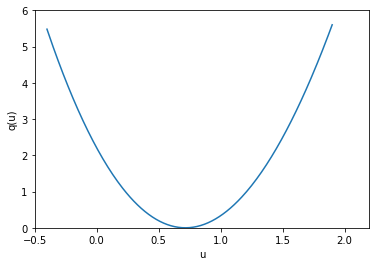

In [19]:
plt.plot(x,q_u)
plt.axis([-0.5,2.2,0,6])
# plt.plot(x1,q_u_noco)
# plt.plot(cms_x_full,cms_y_full,'r')
# plt.plot(cms_x_noco,cms_y_noco,'b')
# plt.plot(full_x,full_y)

#plt.annotate('full corelation',xy=(-.3,5),xytext=(0,5.7),arrowprops={'facecolor':'blue'})
#plt.annotate('no corelation',xy=(.2,4),xytext=(1,5.7),arrowprops={'facecolor':'orange'})
# plt.legend(['full correlation','no correlation','given full correlation','given no correlation','cms full likelihood'])

plt.xlabel('u')
plt.ylabel('q(u)')
#plt.savefig('final.png', dpi=400)
plt.show()

In [ ]:
plt.savefig('full.png')

In [ ]:
pos_cms=[]

In [ ]:
for i in range(len(cms_x_full)):
    for j in range(len(x)):
        if cms_x_full[i]==x[j]:
            pos_cms.append(j)



In [ ]:
pos_cms

In [ ]:
our_qu=[]
for i in pos_cms:
    our_qu.append(q_u[i])

In [ ]:
fnl_cms=cms_y_full/our_qu

In [ ]:
fnl_cms

In [ ]:
from __future__ import division